<h1>Análise da base</h1>
A base de dados é composta por duas abas. Tendo a primeira abas de ocorrências e a segunda de vítimas. Em ambas as abas possuem dois o estado (Utilizei o excel de estado), tipo de crime, ano, mês. Na de ocorrências possuem as ocorrências e a segunda aba possue o numero de vítimas.

*   UF - Qualitativo nominal
*   Tipo Crime - Qualitativo nominal
*   Ano - Qualitativo ordinal
*   Mes - Qualitativo ordinal
*   Ocorrência,Vítimas  - Quantitativo 
Acima foi feito uma analise sobre os tipos dos dados.






In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
from sklearn import preprocessing
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
data_estados = pd.ExcelFile('leitura.xlsx')
data_estados_ocorrencias = pd.read_excel(data_estados, 'Ocorrências')
data_estados_vítimas = pd.read_excel(data_estados, 'Vítimas')
data_estados_vítimas.head(5)

,UF,Tipo Crime,Ano,Mês,Vítimas
0,Acre,Homicídio doloso,2015,janeiro,13
1,Acre,Homicídio doloso,2015,fevereiro,10
2,Acre,Homicídio doloso,2015,março,16
3,Acre,Homicídio doloso,2015,abril,22
4,Acre,Homicídio doloso,2015,maio,15


Na parte de baixo estou verificando se a base está com dados faltantes ou se está completa.

In [ ]:
count_ = data_estados_ocorrencias.count()
count_

UF             17548
Tipo Crime     17548
Ano            17548
Mês            17548
Ocorrências    17548
dtype: int64

In [ ]:
count_ = data_estados_vítimas.count()
count_

UF            5458
Tipo Crime    5458
Ano           5458
Mês           5458
Vítimas       5458
dtype: int64

Pela análise acima está bem balanceado, não existe dados faltantes.

<h1>Análise de gráfico</h1>

<h2>Análise entre atributos qualitativos x quantitativos</h2>

Proximo passo é fazer algumas analises de graficos para saber a relação dos atributos. Primeiramente será feito uma relação entre dois atributos qualitativos x quantitativos.

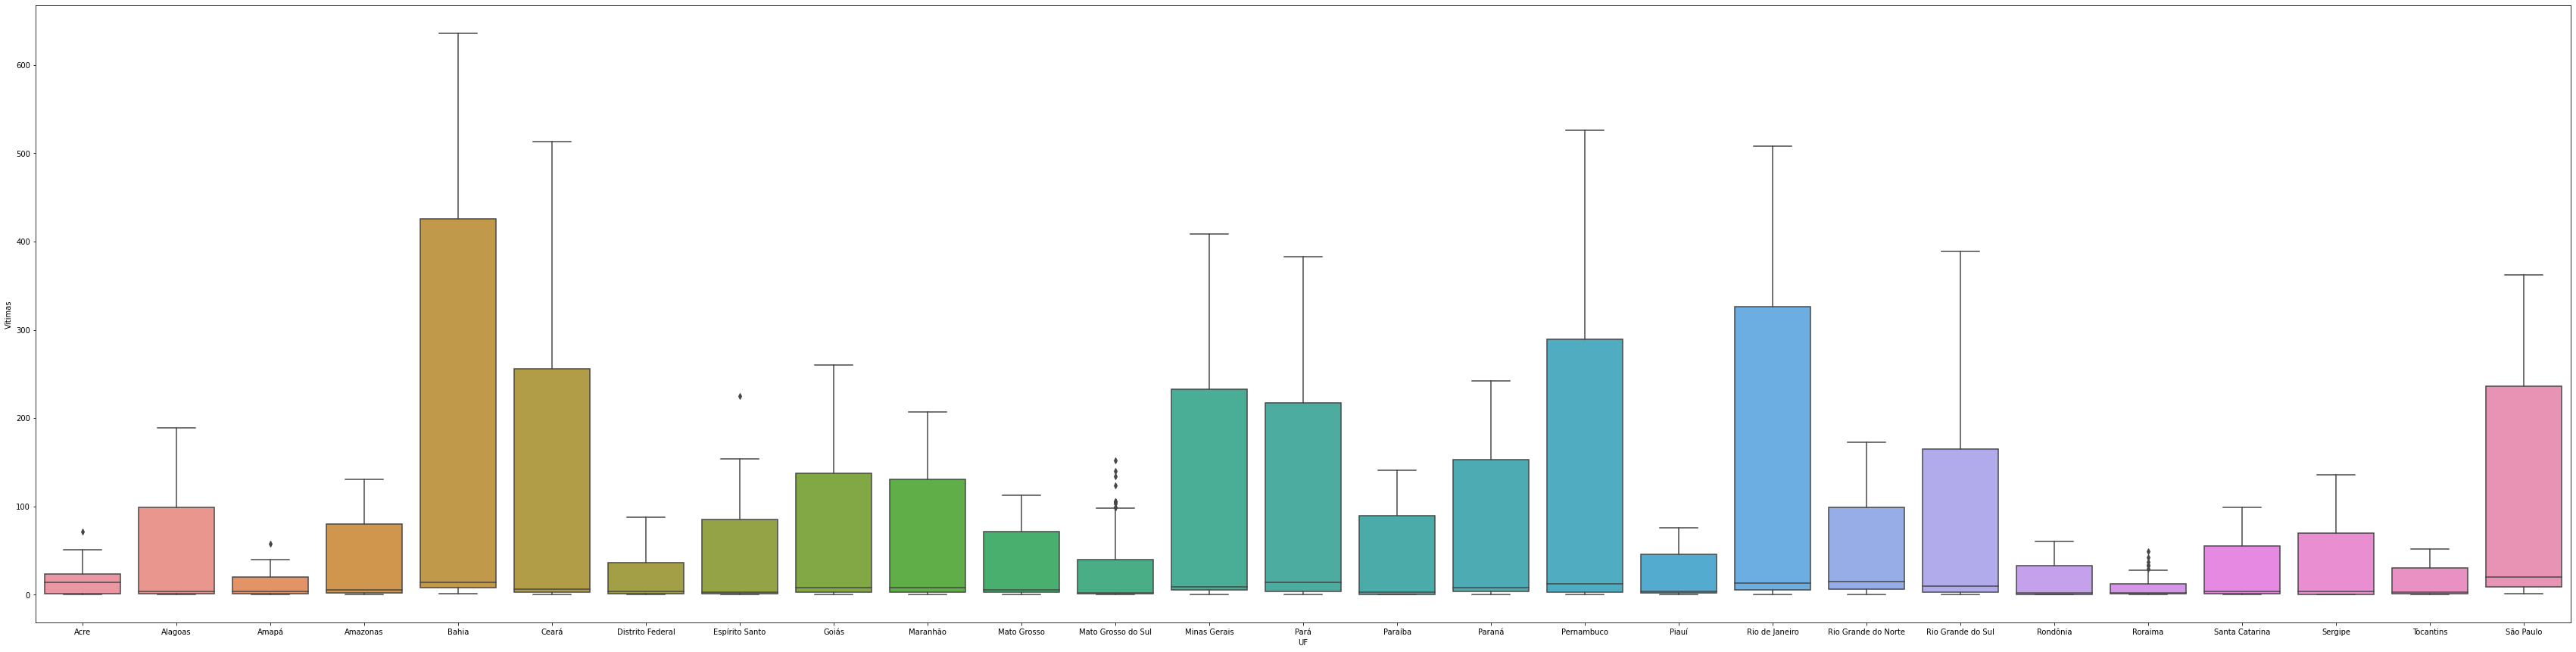

In [ ]:
plt.figure(figsize=(60,15))
ax = sns.boxplot(x="UF", y="Vítimas", data=data_estados_vítimas)

Como pode ter uma analise do gráfico acima, o maior estado que tem numeros de vítimas é a Bahia seguido logo do Rio de Janeiro.

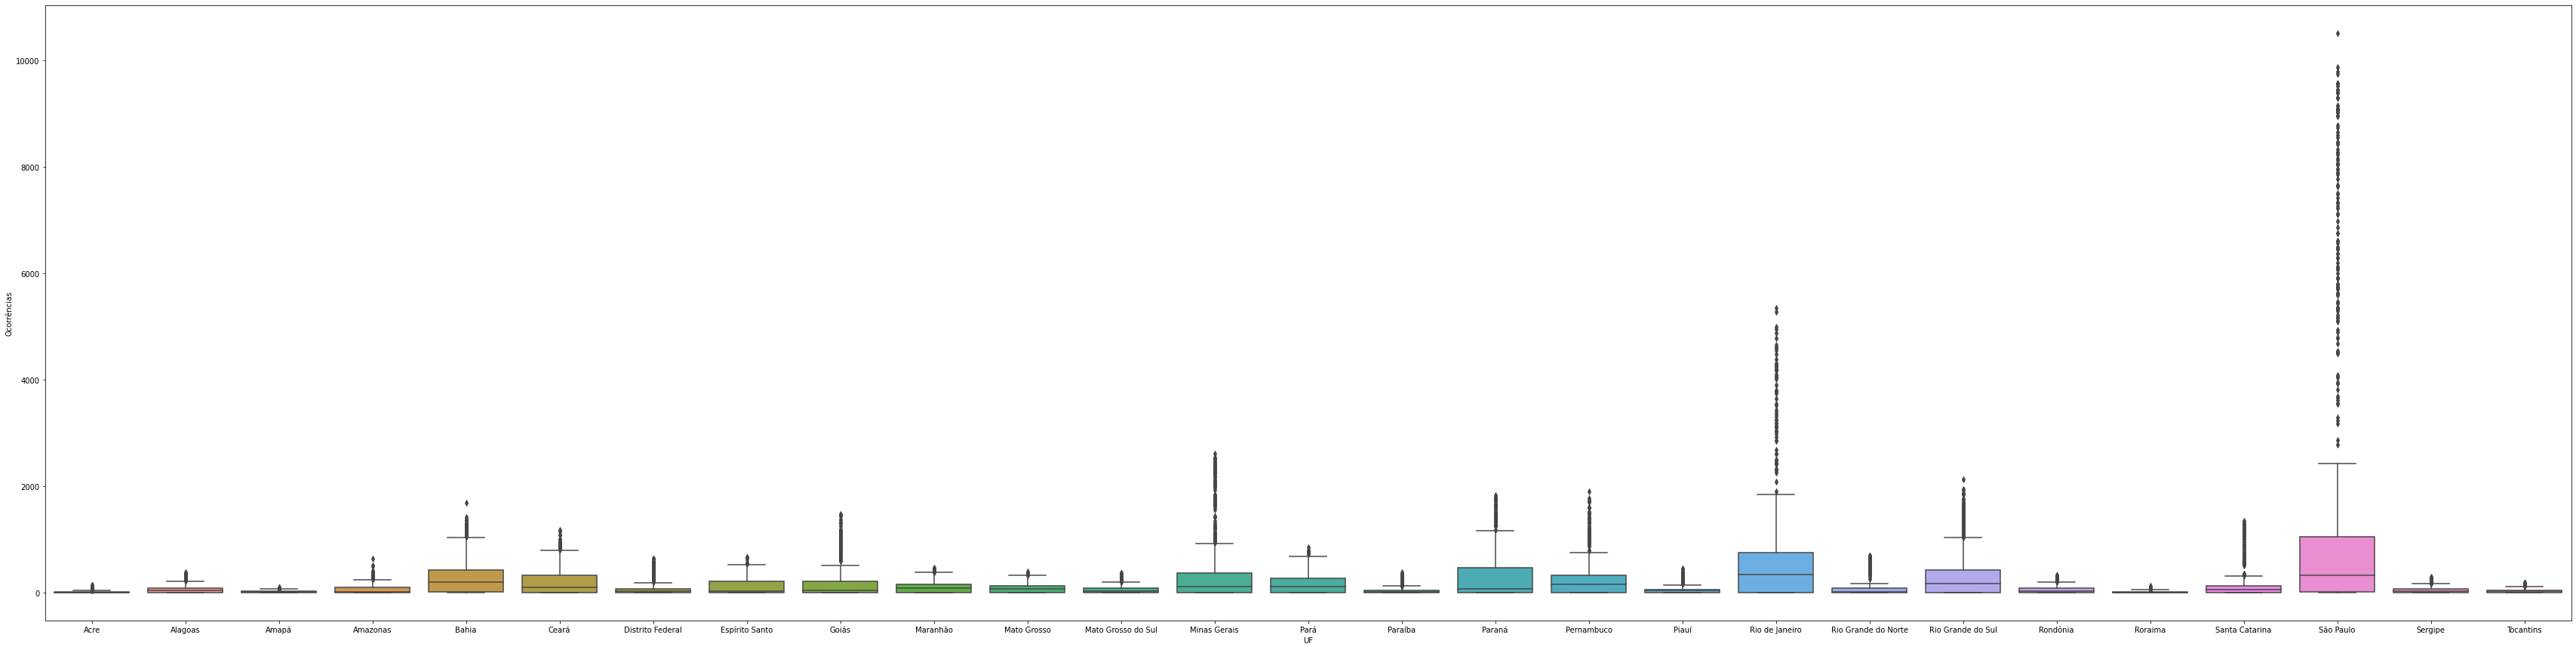

In [ ]:
plt.figure(figsize=(60,15))
ax = sns.boxplot(x="UF", y="Ocorrências", data=data_estados_ocorrencias)

Como pode ter uma analise do gráfico acima, o maior estado que tem numeros de **OCORRÊNCIAS** é São Paulo , seguido do Rio de Janeiro. 

Será feito agora a analise do dado de (Ocorrência ou Vitima) e mês, que são respectivamentes Quantitativo e Qualitativo, continuando o raciocínio anterior.

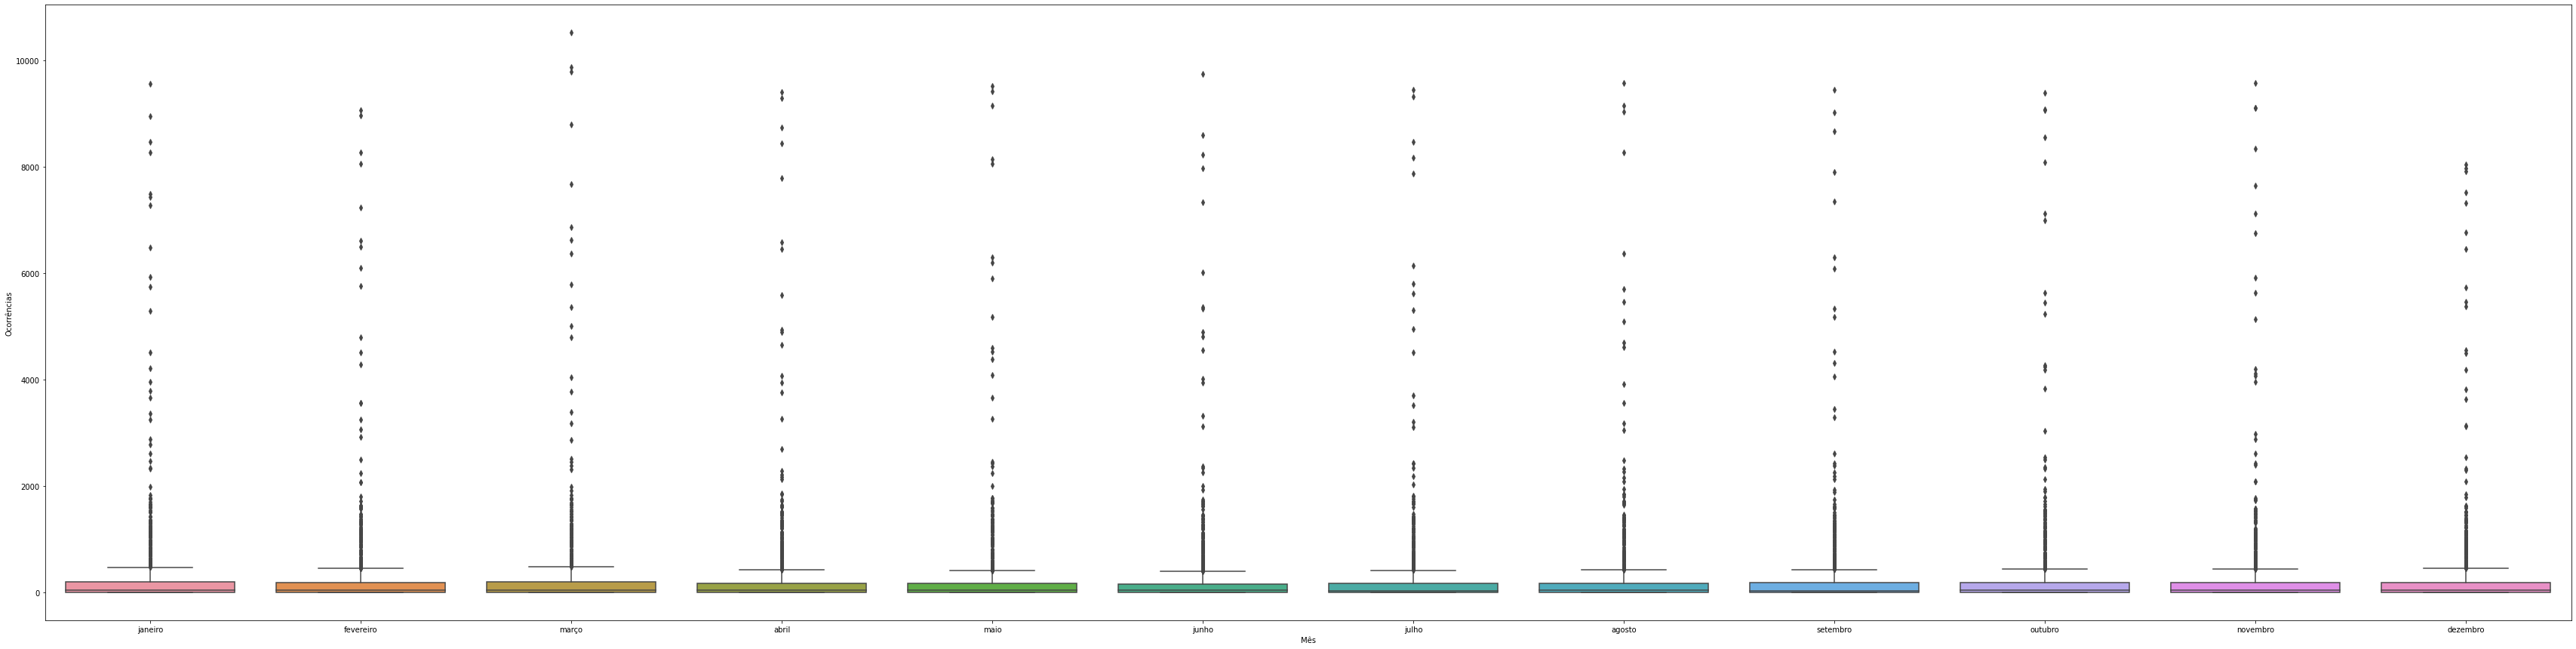

In [ ]:
plt.figure(figsize=(60,15))
ax = sns.boxplot(x="Mês", y="Ocorrências", data=data_estados_ocorrencias)

Como pode se analisar a partir do gráfico acima, existe muitos outliers no gráfico, existe um mês que existe um outlier maior que os outros, que é março, o qual existe mais de 10000, ocorrências, sendo o mês que possui mais ocorrência durante esses anos.

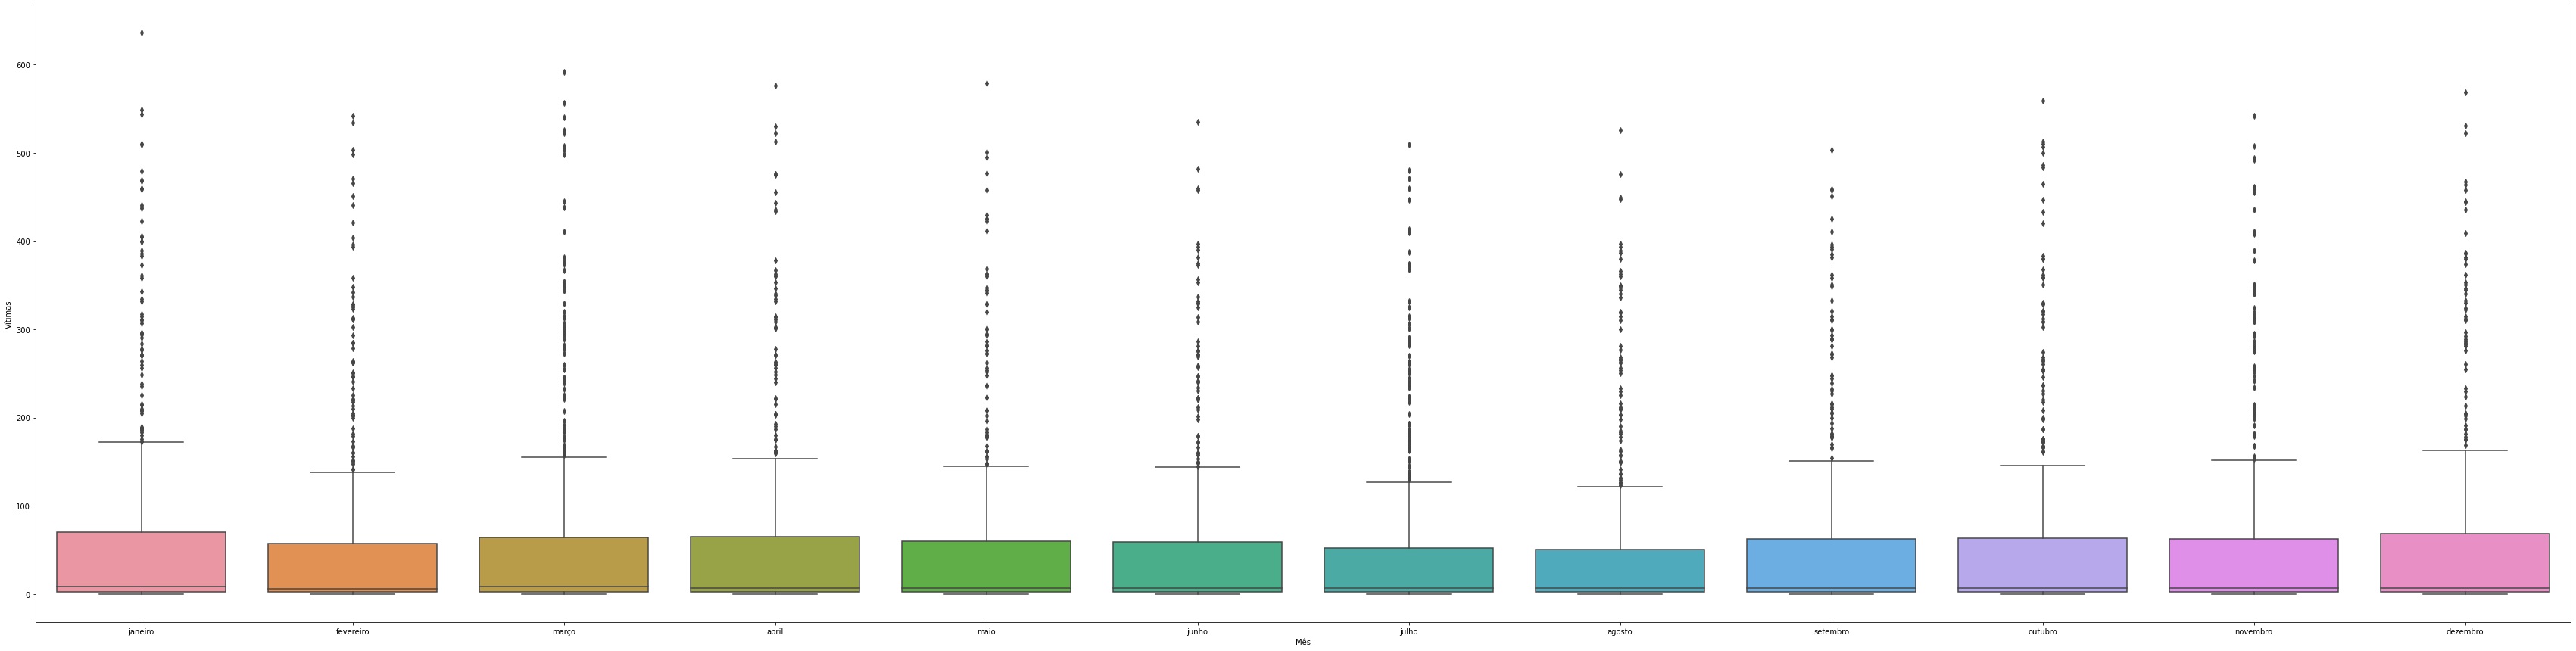

In [ ]:
plt.figure(figsize=(60,15))
ax = sns.boxplot(x="Mês", y="Vítimas", data=data_estados_vítimas)

Como analisado anteriormente, existe bastante outliers tambem nesse gráfico. Porém ja existe uma diferença perceptível nas barras. Sendo janeiro o maior mês com número de vitimas entre esses anos.

<h1>Transformações</h1>

Nessa seção será feita algumas transformações na base, irei alterar o estilo dela para ficar por agrupamento de vítimas por crimes nos estados para melhorar o estudo na clusterização e depois irei fazer a normalização dos dados.

In [ ]:
groupby_ocorrencias = data_estados_ocorrencias.groupby(by=['UF', 'Tipo Crime'])['Ocorrências'].sum().reset_index()
groupby_vítimas = data_estados_vítimas.groupby(by=['UF', 'Tipo Crime'])['Vítimas'].sum().reset_index()


In [ ]:
#Transformação da base para novos datasets
lista_tipo_crime = list(groupby_ocorrencias['Tipo Crime'][0:9]) + ['UF']
lista_tipo_crime
lista_tipo_crime_vitimas = list(groupby_vítimas['Tipo Crime'][0:3]) + ['UF']
dataset_transform_ocorrencias = pd.DataFrame(columns=lista_tipo_crime)
dataset_transform_vitimas = pd.DataFrame(columns=lista_tipo_crime_vitimas)
count = 0
values = []
## Gerando novo dataset ocorrencias
for i in range(len(groupby_ocorrencias)):
    if count < 9:
        values.append(groupby_ocorrencias['Ocorrências'][i])
        count += 1
    if count == 9:
        dataset_transform_ocorrencias.loc[len(dataset_transform_ocorrencias)] = values + [groupby_ocorrencias['UF'][i]]  
        values = []
        count = 0
dataset_transform_ocorrencias

,Estupro,Furto de veículo,Homicídio doloso,Lesão corporal seguida de morte,Roubo a instituição financeira,Roubo de carga,Roubo de veículo,Roubo seguido de morte (latrocínio),Tentativa de homicídio,UF
0,1095,2159,1808,7,12,8,4110,81,479,Acre
1,3582,6966,8606,61,98,416,17782,253,3263,Alagoas
2,2207,3843,1544,101,49,28,1906,119,1318,Amapá
3,5203,14264,6378,152,313,48,18459,376,1725,Amazonas
4,17578,32089,32888,545,130,2061,78599,974,15866,Bahia
5,9835,28094,21983,200,241,1196,54374,373,7876,Ceará
6,3917,33835,2841,34,20,293,25110,206,4915,Distrito Federal
7,3351,26581,7211,80,134,142,24707,241,14488,Espírito Santo
8,3836,60517,12702,252,294,2241,54755,480,13171,Goiás
9,7269,16176,10953,171,411,280,23350,559,6479,Maranhão


In [ ]:
## Gerando novo dataset vitimas
for i in range(len(groupby_vítimas)):
    if count <3:
        values.append(groupby_vítimas['Vítimas'][i])
        count += 1
    if count == 3:
        dataset_transform_vitimas.loc[len(dataset_transform_vitimas)] = values + [groupby_vítimas['UF'][i]]  
        values = []
        count = 0
dataset_transform_vitimas

,Homicídio doloso,Lesão corporal seguida de morte,Roubo seguido de morte (latrocínio),UF
0,1754,7,58,Acre
1,8775,59,251,Alagoas
2,1615,112,107,Amapá
3,6568,157,392,Amazonas
4,34767,546,989,Bahia
5,23089,205,383,Ceará
6,3139,31,301,Distrito Federal
7,7276,83,238,Espírito Santo
8,12852,235,520,Goiás
9,10958,169,563,Maranhão


A partir daqui será feito a normalização dos dados tanto do novo dataset de vítimas quanto o de ocorrências, Começando a partir do de vítimas:

<h3>Normalização novo dataset vítimas:</h3>

In [ ]:
x = dataset_transform_vitimas[['Homicídio doloso',	'Lesão corporal seguida de morte',	'Roubo seguido de morte (latrocínio)']].values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dataset_transform_vitimas_norm = pd.DataFrame(x_scaled, index=dataset_transform_vitimas.index, columns=['Homicídio doloso',	'Lesão corporal seguida de morte',	'Roubo seguido de morte (latrocínio)'])
dataset_transform_vitimas_norm['UF'] = dataset_transform_vitimas['UF']
dataset_transform_vitimas_norm

,Homicídio doloso,Lesão corporal seguida de morte,Roubo seguido de morte (latrocínio),UF
0,0.018755,0.000000,0.000000,Acre
1,0.227440,0.047575,0.190335,Alagoas
2,0.014624,0.096066,0.048323,Amapá
3,0.161842,0.137237,0.329389,Amazonas
4,1.000000,0.493138,0.918146,Bahia
5,0.652895,0.181153,0.320513,Ceará
6,0.059922,0.021958,0.239645,Distrito Federal
7,0.182886,0.069533,0.177515,Espírito Santo
8,0.348621,0.208600,0.455621,Goiás
9,0.292326,0.148216,0.498028,Maranhão


<h3>Normalização novo dataset ocorrências:</h3>

In [ ]:
lista_array_ocorrencias = list(dataset_transform_ocorrencias.columns[0:9])
x = dataset_transform_ocorrencias[lista_array_ocorrencias].values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dataset_transform_ocorrências_norm = pd.DataFrame(x_scaled, index=dataset_transform_vitimas.index, columns=lista_array_ocorrencias)
dataset_transform_ocorrências_norm['UF'] = dataset_transform_ocorrencias['UF']
dataset_transform_ocorrências_norm

,Estupro,Furto de veículo,Homicídio doloso,Lesão corporal seguida de morte,Roubo a instituição financeira,Roubo de carga,Roubo de veículo,Roubo seguido de morte (latrocínio),Tentativa de homicídio,UF
0,0.000000,0.000000,0.022642,0.000000,0.000000,0.000116,0.006085,0.004340,0.000000,Acre
1,0.038264,0.008324,0.236415,0.050373,0.176955,0.008029,0.043831,0.110973,0.120296,Alagoas
2,0.017109,0.002916,0.014340,0.087687,0.076132,0.000504,0.000000,0.027898,0.036253,Amapá
3,0.063205,0.020960,0.166352,0.135261,0.619342,0.000892,0.045701,0.187229,0.053839,Amazonas
4,0.253604,0.051825,1.000000,0.501866,0.242798,0.039929,0.211739,0.557967,0.664866,Bahia
5,0.134472,0.044908,0.657075,0.180037,0.471193,0.023155,0.144857,0.185369,0.319621,Ceará
6,0.043419,0.054849,0.055126,0.025187,0.016461,0.005643,0.064063,0.081835,0.191678,Distrito Federal
7,0.034710,0.042288,0.192547,0.068097,0.251029,0.002715,0.062950,0.103534,0.605323,Espírito Santo
8,0.042172,0.101050,0.365220,0.228545,0.580247,0.043420,0.145909,0.251705,0.548416,Goiás
9,0.094992,0.024271,0.310220,0.152985,0.820988,0.005391,0.059204,0.300682,0.259258,Maranhão


<h1>Inicio da clusterização</h1>

A partir dessa seção será feito um mapa de calor para descobrir a proximidade das regiões para assim, a partir dessa solução tirar a conclusão de que grupo é o cluster, se é um estado perigoso ou não. Será feito separadamente, para a tabela de ocorrência e depois de vítimas 

<h2>Ocorrências:</h2>

In [ ]:
from scipy.spatial.distance import pdist, squareform

In [ ]:
lista_array_ocorrencias = list(dataset_transform_ocorrencias.columns[0:9])
dataframe_dist = pd.DataFrame(
    squareform(pdist(dataset_transform_ocorrências_norm[lista_array_ocorrencias], metric='euclidean')),
    columns = dataset_transform_ocorrências_norm.UF,
    index = dataset_transform_ocorrências_norm.UF
)

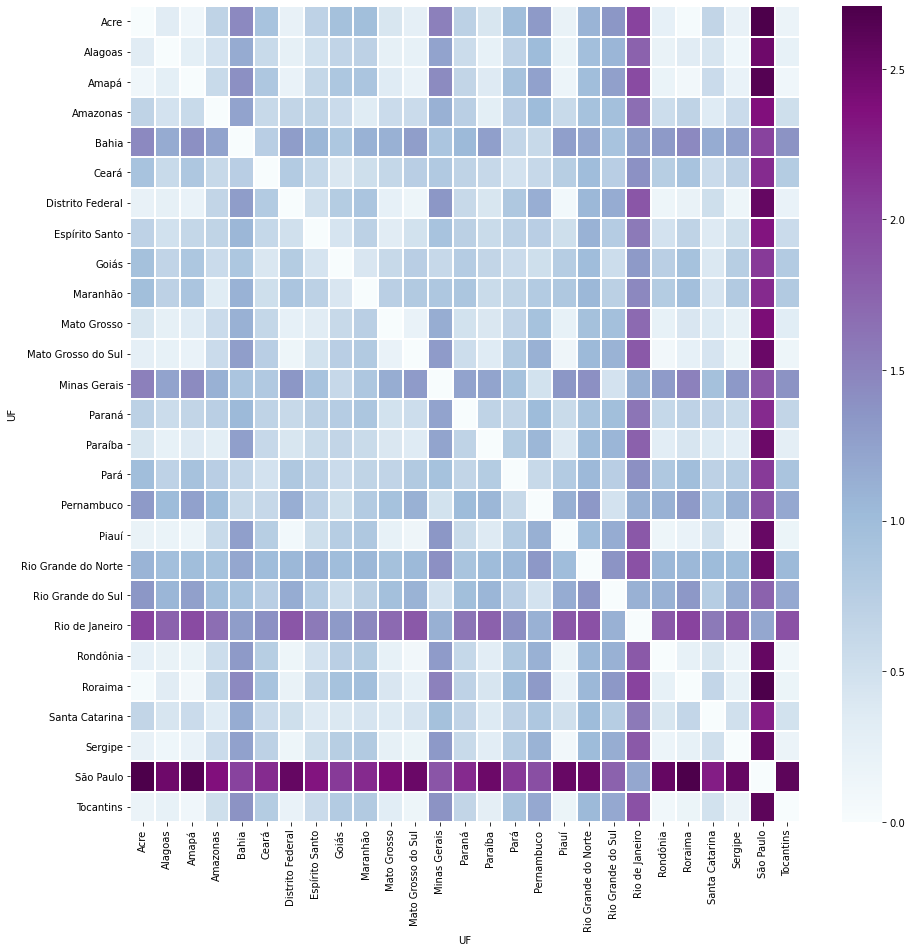

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(
    dataframe_dist,
    cmap='BuPu',
    linewidth=1
)

Como pode-se analisar o heatmap acima quant o mais "quente" (forte a cor) maior a proximidade. E pelo estudo do grafico são paulo tem uma proximidade de ocorrências muito grande com outros. Com o código abaixo, será feito uma melhor extração, pois irá mostrar as respectivas cidades e suas similaredades, assim podendo entender a similaridade entre elas.

In [ ]:
dataframe_unstack = dataframe_dist.unstack()

dataframe_unstack.index.rename(["Estado A", "Estado B"], inplace=True)
dataframe_unstack = dataframe_unstack.to_frame('Similaridade').reset_index()

In [ ]:
dataframe_unstack[
    (dataframe_unstack['Similaridade'] < 0.1) 
    & (dataframe_unstack['Estado A'] != dataframe_unstack['Estado B'])
]

,Estado A,Estado B,Similaridade
22,Acre,Roraima,0.047592
76,Amapá,Roraima,0.097612
179,Distrito Federal,Piauí,0.090856
318,Mato Grosso do Sul,Rondônia,0.098068
465,Piauí,Distrito Federal,0.090856
483,Piauí,Sergipe,0.099308
578,Rondônia,Mato Grosso do Sul,0.098068
594,Roraima,Acre,0.047592
596,Roraima,Amapá,0.097612
665,Sergipe,Piauí,0.099308


Como pode-se analisar a tabela a cima, entre esses dados, os mais similares são os conjuntos: (Acre e Roraima), (Amapá e Roraima), (Distrito federal e Piauí),(Mato Grosso do Sul e Rondônia), (Piauí e Sergipe). Podendo ser assim divido em 5 grupo.
Sendo esses a seguir o que tem mais similaridade:

1.   (Piauí e Sergipe)
2.   (Mato Grosso do Sul e Rondônia)
3.   (Amapá e Roraima)
4.   (Distrito federal e Piauí)
5.   (Acre e Roraima)

Como pode-se perceber da tabela original, irei fazer com numero de cluster igual a 2. Então estou levando em consideração tanto para ocorrência quanto para vítima, analisando a tabela original, que o Acre possui o menor numero de ocorrências e vítimas, logo quem cair no cluster dele é o que possui menor numero de ocorrências. Porém quem cair no cluster contrario é que possui um maior numero de ocorrências.






<h1>Vítimas</h1>

Como foi explicado no bloco de cima irá ser feito a mesma coisa, com os mesmos passos.

In [ ]:
dataframe_dist = pd.DataFrame(
    squareform(pdist(dataset_transform_vitimas_norm[['Homicídio doloso',	'Lesão corporal seguida de morte',	'Roubo seguido de morte (latrocínio)']], metric='euclidean')),
    columns = dataset_transform_vitimas_norm.UF,
    index = dataset_transform_vitimas_norm.UF
)

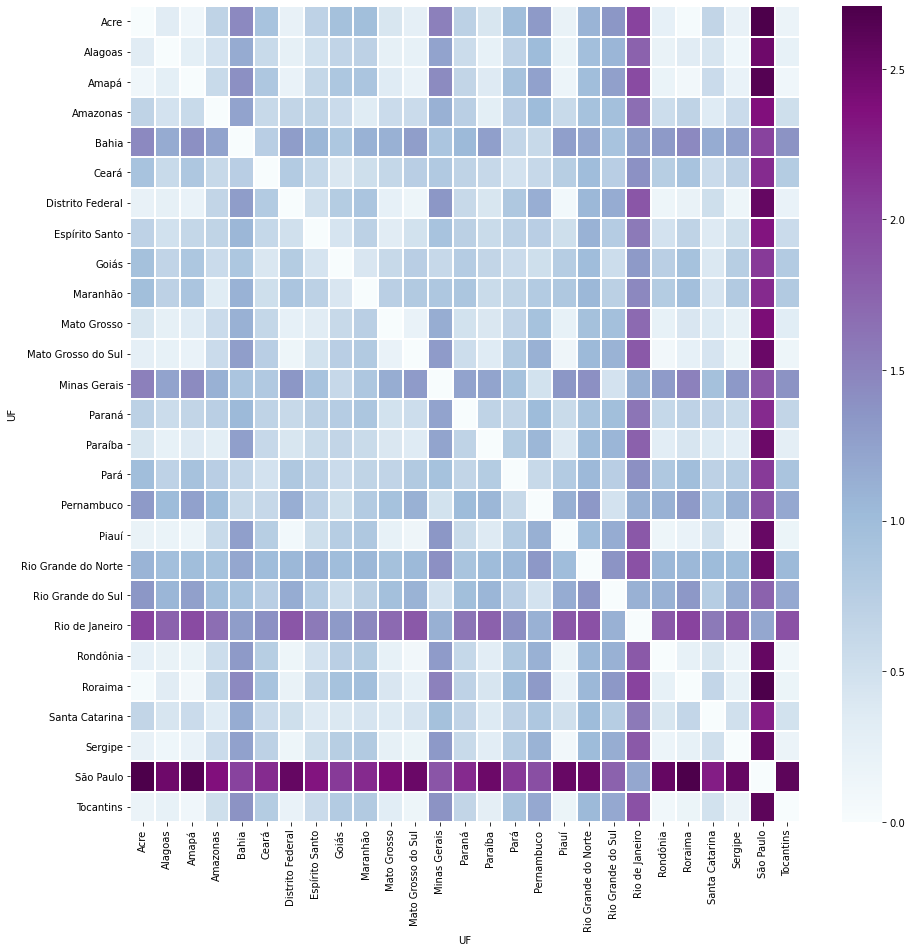

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(
    dataframe_dist,
    cmap='BuPu',
    linewidth=1
)

In [ ]:
dataframe_unstack = dataframe_dist.unstack()

dataframe_unstack.index.rename(["Estado A", "Estado B"], inplace=True)
dataframe_unstack = dataframe_unstack.to_frame('Similaridade').reset_index()

In [ ]:
dataframe_unstack[
    (dataframe_unstack['Similaridade'] < 0.1) 
    & (dataframe_unstack['Estado A'] != dataframe_unstack['Estado B'])
]

,Estado A,Estado B,Similaridade
22,Acre,Roraima,0.047592
76,Amapá,Roraima,0.097612
179,Distrito Federal,Piauí,0.090856
318,Mato Grosso do Sul,Rondônia,0.098068
465,Piauí,Distrito Federal,0.090856
483,Piauí,Sergipe,0.099308
578,Rondônia,Mato Grosso do Sul,0.098068
594,Roraima,Acre,0.047592
596,Roraima,Amapá,0.097612
665,Sergipe,Piauí,0.099308


Ocorreu a mesma conclusão que a tabela de ocorrencias. Sendo o mesmo sentido, Quanto mais ocorrência, provavelmente terá mais vítimas

<h1>Aplicação Clusterização</h1>

Será feito da mesma forma, porém agora é a aplicação do algoritmo, primeiro para ocorrência e após disso será feito para vítimas. Para analisar os grupos em que cada estado está. E a partir dessa analise do Heatmap que foi feita anteriormente e os dados originais, podemos presumir a partir do grupo do cluster se o estado possue muita ocorrência ou pouca ocorrência. Pela analise estou levando em consideração que roraima e acre possuem os menores níveis, com relação aos outros, então os que possuem o mesmo grupo que eles será considerado "pouco" nível de ocorrência.

<h2>Ocorrência:</h2>

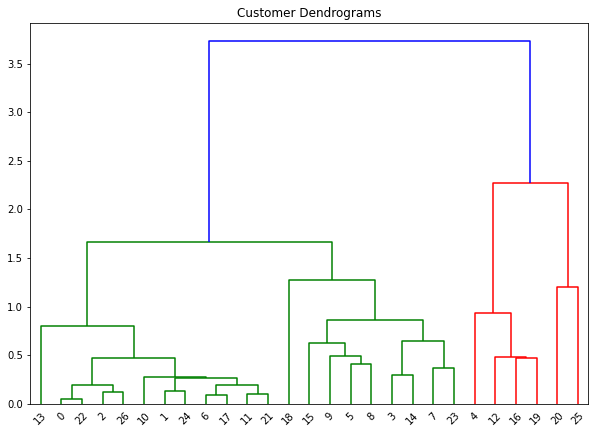

In [ ]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
plt.figure(figsize=(10, 7))
## Criando o dendrograma para analisar quantos clusters utilizar. 
plt.title("Customer Dendrograms")
dend = shc.dendrogram(shc.linkage(dataset_transform_ocorrências_norm[lista_array_ocorrencias], method='ward'))

Utilizei o Cluster Hierárquico, para fazer as analises. A partir dele fo feito o dendrogram gráfico, que por meio da sua análise escolhi utilizar 2 clusters que são as melhores da visualização

In [ ]:
agg_cluster = AgglomerativeClustering(affinity='euclidean', linkage='ward')
agg_cluster.fit(dataset_transform_ocorrências_norm[lista_array_ocorrencias])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [ ]:
clusters_h = agg_cluster.labels_.tolist()
clusters_dict_h = { 'code': list(dataset_transform_ocorrências_norm.UF), 'cluster': clusters_h}
dataframe_clusters_h_ocorrencia = pd.DataFrame(clusters_dict_h, columns = ['cluster','code'])
dataframe_clusters_h_ocorrencia

,cluster,code
0,1,Acre
1,1,Alagoas
2,1,Amapá
3,1,Amazonas
4,0,Bahia
5,0,Ceará
6,1,Distrito Federal
7,1,Espírito Santo
8,0,Goiás
9,0,Maranhão


Pela analise da similaridade e pelos os dados da tabela original, os que possuem o cluster de roraima e acre (1), são considerados os que possuem menos ocorrências. Os que possuem 0 são os que possuem os maíores indices de ocorrências.

<h1>Vítimas</h1>

Agora será feito a analíse da tabela de vítimas.

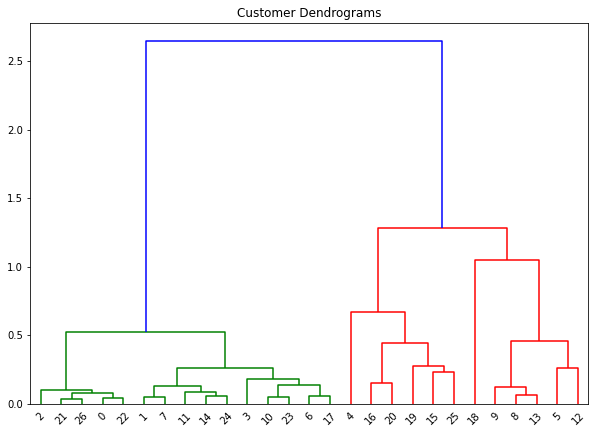

In [ ]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
plt.figure(figsize=(10, 7))
## Criando o dendrograma para analisar quantos clusters utilizar. 
plt.title("Customer Dendrograms")
dend = shc.dendrogram(shc.linkage(dataset_transform_vitimas_norm[['Homicídio doloso',	'Lesão corporal seguida de morte',	'Roubo seguido de morte (latrocínio)']], method='ward'))

In [ ]:
agg_cluster = AgglomerativeClustering(affinity='euclidean', linkage='ward')
agg_cluster.fit(dataset_transform_vitimas_norm[['Homicídio doloso',	'Lesão corporal seguida de morte',	'Roubo seguido de morte (latrocínio)']])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [ ]:
clusters_h = agg_cluster.labels_.tolist()
clusters_dict_h = { 'code': list(dataset_transform_vitimas_norm.UF), 'cluster': clusters_h}
dataframe_clusters_h_vitimas = pd.DataFrame(clusters_dict_h, columns = ['cluster','code'])
dataframe_clusters_h_vitimas

,cluster,code
0,1,Acre
1,1,Alagoas
2,1,Amapá
3,1,Amazonas
4,0,Bahia
5,0,Ceará
6,1,Distrito Federal
7,1,Espírito Santo
8,0,Goiás
9,0,Maranhão


Analisando com os dados de ocorrência está correto a logíca de se manter a mesma tabela. Pois se existe uma grande ocorrência ou pouca ocorrência, logo então tera maior quantidade de vítimas ou menor quantidade de vítimas,respectivamente. Sendo o cluster 1 pouco numero de vítimas, e 0 uma grande quantidade de vítimas.

<h1>Visualização</h1>

Será a mesma coisa, primeiro Ocorrência, depois vítimas. Irei utilizar o geopandas, baixei os dados no site do ibge, fiz um merge entre as tabelas, para ativar o geometry de cada um e plotar o gráfico.

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 5.2MB/s 
     |████████████████████████████████| 6.6MB 18.1MB/s 
     |████████████████████████████████| 15.4MB 222kB/s 


<h2>Ocorrências</h2>

In [ ]:
### Iniciando geopandas
import geopandas as gpd
INFO = gpd.read_file('bcim_2016_21_11_2018.gpkg', layer='lim_unidade_federacao_a')

In [ ]:
#Renomeando a coluna para fazer o merge
INFO.rename({'nome':'code'}, axis=1, inplace=True)

In [ ]:
#Criando uma nova tabela a partir do merge 
BRASIL = INFO.merge(dataframe_clusters_h_ocorrencia, on = "code", how='left')
BRASIL[['code', 'cluster', 'geometry']]

,code,cluster,geometry
0,Goiás,0,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743..."
1,Mato Grosso do Sul,1,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159..."
2,Paraná,0,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903..."
3,Minas Gerais,0,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750..."
4,Sergipe,1,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ..."
5,Alagoas,1,"MULTIPOLYGON (((-35.45878 -8.81780, -35.45898 ..."
6,Tocantins,1,"MULTIPOLYGON (((-48.34644 -5.17871, -48.34311 ..."
7,Roraima,1,"MULTIPOLYGON (((-60.17793 5.23024, -60.16619 5..."
8,Amazonas,1,"MULTIPOLYGON (((-67.32285 2.04176, -67.29220 1..."
9,Acre,1,"MULTIPOLYGON (((-73.73811 -7.13471, -72.90246 ..."


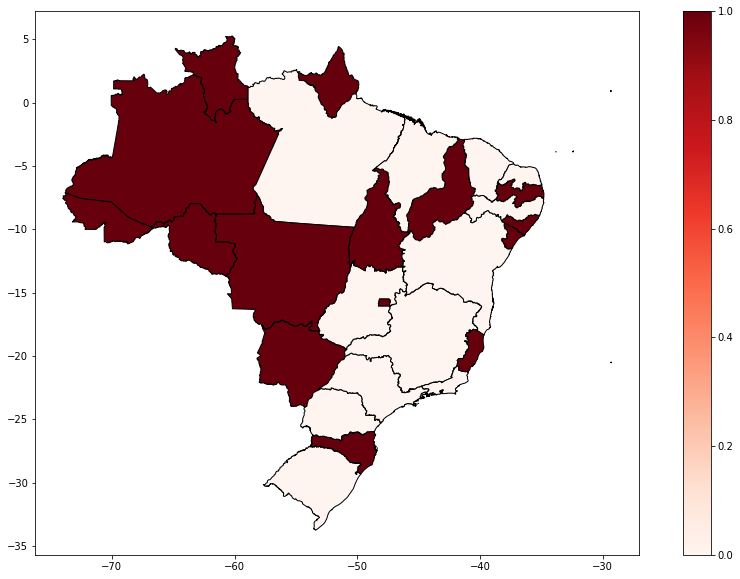

In [ ]:
%matplotlib inline
BRASIL.plot(column = 'cluster', cmap = 'Reds', figsize = (16,10), legend = True, edgecolor = 'black')

Com os codigos acima, fiz o plot do gráfico com as regiões pintadas de vermelho são os estados que ocorrem os menores numeros de ocorrências, e os que estão branco são os que ocorrem os maiores índices de ocorrência. Como foi explicado essa análise foi feito por meio da similaridade. Agora irá ser feito pelo numero de vítimas.

<h2>Vítimas</h2>

In [ ]:
#Renomeando a coluna para fazer o merge
INFO_Vitimas = gpd.read_file('bcim_2016_21_11_2018.gpkg', layer='lim_unidade_federacao_a')
INFO_Vitimas.rename({'nome':'code'}, axis=1, inplace=True)

In [ ]:
#Criando uma nova tabela a partir do merge 
BRASIL_Vitimas = INFO_Vitimas.merge(dataframe_clusters_h_vitimas, on = "code", how='left')
BRASIL_Vitimas[['code', 'cluster', 'geometry']]

,code,cluster,geometry
0,Goiás,0,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743..."
1,Mato Grosso do Sul,1,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159..."
2,Paraná,0,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903..."
3,Minas Gerais,0,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750..."
4,Sergipe,1,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ..."
5,Alagoas,1,"MULTIPOLYGON (((-35.45878 -8.81780, -35.45898 ..."
6,Tocantins,1,"MULTIPOLYGON (((-48.34644 -5.17871, -48.34311 ..."
7,Roraima,1,"MULTIPOLYGON (((-60.17793 5.23024, -60.16619 5..."
8,Amazonas,1,"MULTIPOLYGON (((-67.32285 2.04176, -67.29220 1..."
9,Acre,1,"MULTIPOLYGON (((-73.73811 -7.13471, -72.90246 ..."


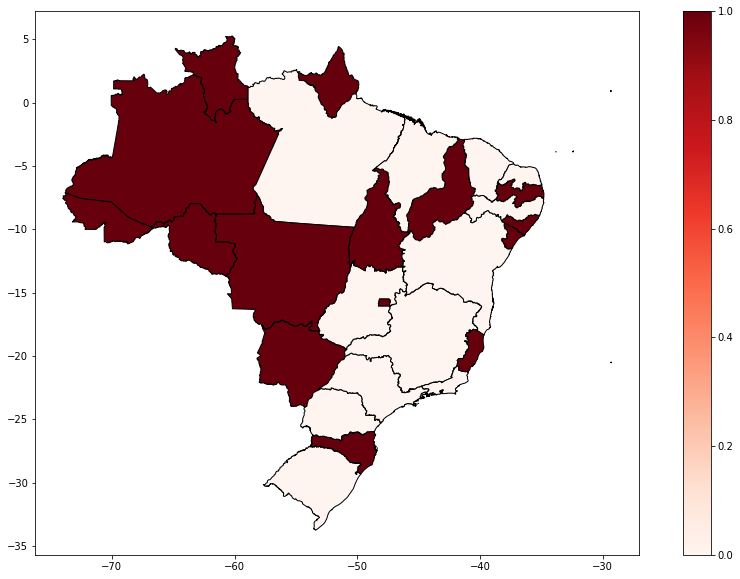

In [ ]:
%matplotlib inline
BRASIL_Vitimas.plot(column = 'cluster', cmap = 'Reds', figsize = (16,10), legend = True, edgecolor = 'black')

Mesma conclusão da de ocorrências, e analisadas anteriormente que as regiões que possuem maior indices de ocorrências existem um numero maior de vítimas. Regiões em vermelho são as que possuem os menores numeros de vítimas e as de branco possuem os maiores números de vítimas.